In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler



df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Loan%20Eligibility%20Prediction.csv')
df

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N
610,525,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N
611,551,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N
612,552,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y


In [2]:
# обращаем столбцы тииа object в бинарные
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data = df.copy()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = encoder.fit_transform(data[col])
data.head()
data

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,0,0,0,0,0,2378,0.0,9,360,1,2,0
1,15,1,1,2,0,0,1299,1086.0,17,120,1,2,1
2,95,1,0,0,1,0,3620,0.0,25,120,1,1,1
3,134,1,1,0,0,1,3459,0.0,25,120,1,1,1
4,556,1,1,1,0,0,5468,1032.0,26,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,1,1,2,0,0,2947,1603.0,10,360,1,2,0
610,525,1,0,0,0,0,4680,2087.0,15,360,1,1,0
611,551,1,1,2,0,1,6633,0.0,25,360,0,0,0
612,552,1,1,1,1,0,2492,2375.0,30,360,1,0,1


In [3]:
clean_data = data[(data['Loan_Amount']>=data['Loan_Amount'].quantile(0.05))&(data['Loan_Amount']<=data['Loan_Amount'].quantile(0.95))]


In [4]:
features = clean_data.drop(['Loan_Status', 'Customer_ID'], axis = 1)

target = clean_data['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(features.values, target.values, test_size=0.25, random_state = 21)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1score, support =  precision_recall_fscore_support(y_test, y_pred)
precision, recall, f1score, support


(array([0.9      , 0.8220339]),
 array([0.46153846, 0.97979798]),
 array([0.61016949, 0.89400922]),
 array([39, 99]))

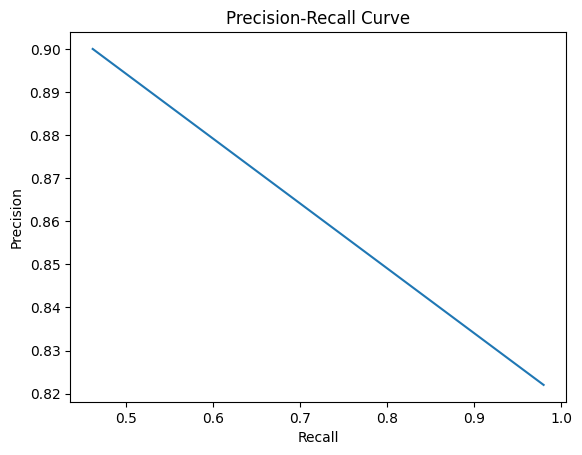

In [6]:
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [7]:
cld=clean_data
features = ['Applicant_Income', 'Loan_Amount', 'Loan_Amount_Term', 'Credit_History']

target = ['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(cld[features], cld[target], test_size=0.25, random_state = 42)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1score, support =  precision_recall_fscore_support(y_test, y_pred)
precision, recall, f1score, support

(array([0.94117647, 0.80991736]),
 array([0.41025641, 0.98989899]),
 array([0.57142857, 0.89090909]),
 array([39, 99]))

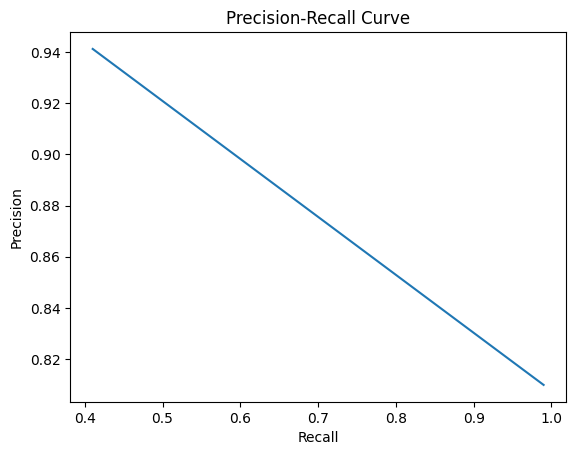

In [9]:
#Precision-Recall Curve
fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [10]:
y_prob = model.predict_proba(x_test)[:, -1]
y_prob.shape

(138,)

In [11]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

false_positive_rate.shape, true_positive_rate.shape, thresholds.shape

((39,), (39,), (39,))

In [12]:
from sklearn.metrics import roc_auc_score

# расчет площади под ROC кривой
roc_auc = metrics.roc_auc_score(y_test, y_prob)
roc_auc

np.float64(0.6272986272986273)

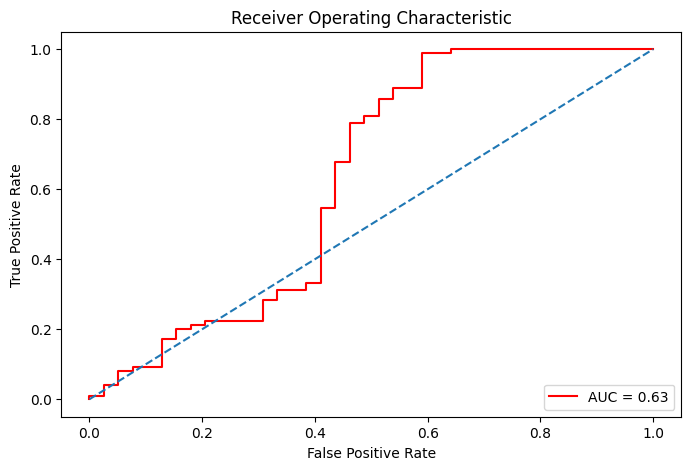

In [13]:
# roc curve
plt.figure(figsize=(8, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

порог Y=1 означает идеальное состояние, когда модель предсказывает единицы в 100% случаях и не ошибается в предсказаниях значения 1.
вариант оценки точности модели

In [14]:
#предсказания для тестовой выборки
#вероятности предсказания

y_pred = model.predict(x_test)


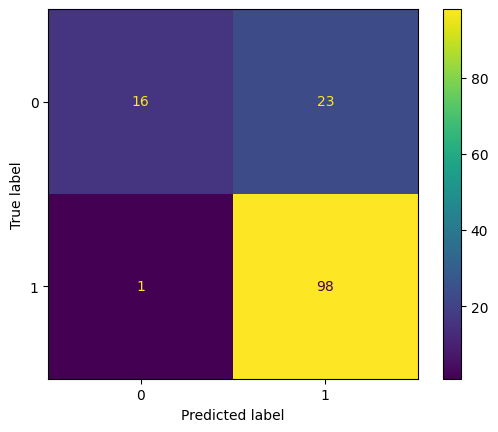

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()


In [19]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
print('accuracy ', accuracy_score(y_test, y_pred))
print('precision ', precision_score(y_test, y_pred))
print('recall ', recall_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))



accuracy  0.8260869565217391
precision  0.8099173553719008
recall  0.98989898989899
f1 0.8909090909090909
